In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'sampledata/reduced/'
subdirs = ['Qtrain/', 'Qtest/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		print(newdir)
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
counter = 0

# copy training dataset images into subdirectories
src_directory = 'sampledata/train/'
for file in listdir(src_directory):
	counter = counter + 1
	print(counter)
	if (counter == 500):
		break
	src = src_directory + '/' + file
	dst_dir = 'Qtrain/'
	if random() < val_ratio:
		dst_dir = 'Qtest/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [ ]:

from shutil import copyfile
from os import listdir

# copy test dataset images into subdirectories
src_directory = 'sampledata/test/'
dst_directory = 'sampledata/mid-size/test/all/'

counter = 0

for file in listdir(src_directory):
	counter = counter + 1
	print(counter)
	if (counter == 1250):
	 	break
	src = src_directory + '/' + file
	dst = dst_directory + '/' + file   
	copyfile(src, dst)


In [ ]:
from shutil import copyfile
from os import listdir

src_directory = 'sampledata/test/'
dst_directory = 'sampledata/reduced/test/'

for file in listdir(src_directory):
	counter = counter + 1
	print(counter)
	if (counter == 200):
		break
	src = src_directory + file
	dst = dst_directory + file
	copyfile(src, dst)

In [ ]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterator
	train_it = datagen.flow_from_directory('sampledata/reduced/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('sampledata/reduced/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=5, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	
	predictions = model.predict(test_X)
		
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

In [ ]:

# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
from shutil import copyfile

# define location of dataset
srcfolder = 'sampledata/test/'
dstfolder = 'sampledata/reduced/test/'
# plot first few images
for i in range(100):
	# define subplot
	# pyplot.subplot(330 + 1 + i)
	# define filename
	src = srcfolder + 'cat.' + str(i) + '.jpg'
	dst = dstfolder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	# image = imread(src)
	# plot raw pixel data
	# pyplot.imshow(image)

	copyfile(src, dst)

# show the figure
pyplot.show()

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'sampledata/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + '.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure


In [ ]:

# check images - reduce bytes

import os
import tensorflow as tf

num_skipped = 0
folder_name = "reduced/test"

folder_path = os.path.join("sampledata", folder_name)
for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
        fobj = open(fpath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
        fobj.close()

    if not is_jfif:
        num_skipped += 1
        # Delete corrupted image
        os.remove(fpath)

print("Deleted %d images" % num_skipped)

In [1]:
import tensorflow as tf
from tensorflow import keras

#load all the images from the directories

image_size = (200, 200)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "sampledata/max/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "sampledata/max/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "sampledata/max/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)




Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 12500 files belonging to 1 classes.


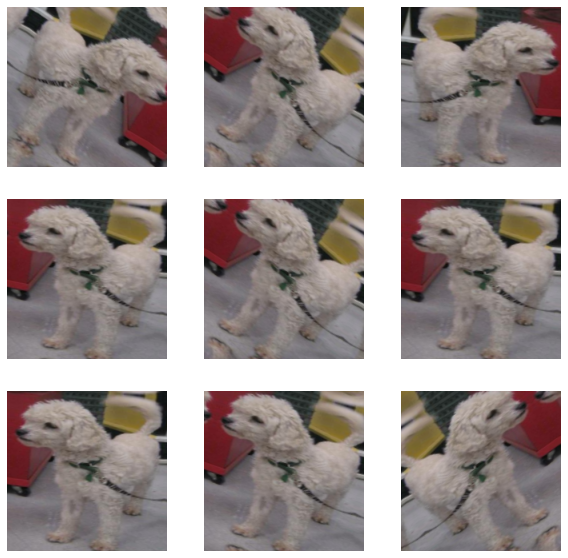

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow import keras

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

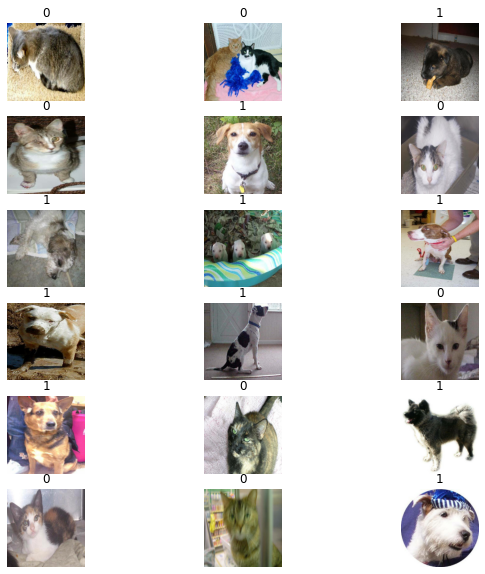

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(18):
        ax = plt.subplot(6, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)


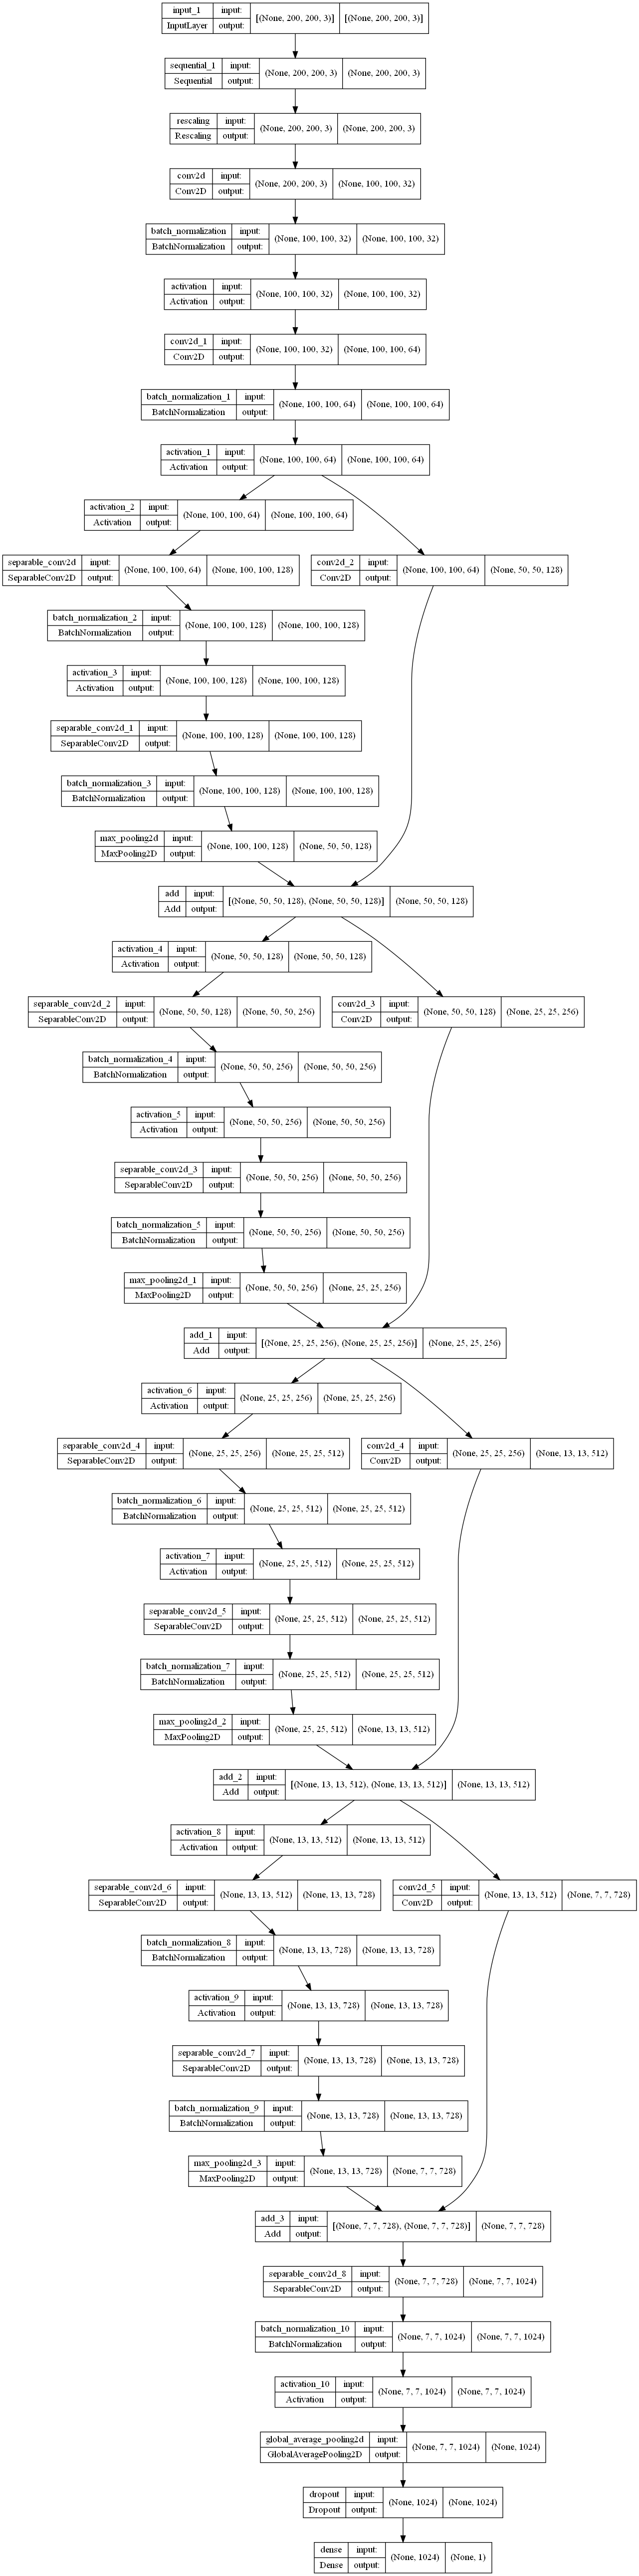

In [6]:
image_size = (200, 200)

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [9]:
# epochs = 50
epochs = 15

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/15
625/625 [==============================] - 1578s 3s/step - loss: 0.1659 - accuracy: 0.9324 - val_loss: 0.2388 - val_accuracy: 0.9010
Epoch 2/15
625/625 [==============================] - 1566s 3s/step - loss: 0.1582 - accuracy: 0.9352 - val_loss: 0.1463 - val_accuracy: 0.9418
Epoch 3/15
625/625 [==============================] - 1576s 3s/step - loss: 0.1479 - accuracy: 0.9387 - val_loss: 0.1650 - val_accuracy: 0.9318
Epoch 4/15
625/625 [==============================] - 1510s 2s/step - loss: 0.1419 - accuracy: 0.9423 - val_loss: 0.2810 - val_accuracy: 0.8894
Epoch 5/15
625/625 [==============================] - 1487s 2s/step - loss: 0.1351 - accuracy: 0.9442 - val_loss: 0.1464 - val_accuracy: 0.9430
Epoch 6/15
625/625 [==============================] - 1487s 2s/step - loss: 0.1269 - accuracy: 0.9488 - val_loss: 0.1214 - val_accuracy: 0.9526
Epoch 7/15
625/625 [==============================] - 1544s 2s/step - loss: 0.1153 - accuracy: 0.9528 - val_loss: 0.1132 - val_accuracy:

In [11]:
import pandas as pd
from datetime import datetime
import numpy as np
import re
import os

def GetIndexNumberFromFileName(fileName):
    x= os.path.basename(fileName)
    return x.split('.')[0]

def GetFileOutPutName(prefix):
  #  return 'solution.csv'
  return 'Kaggle-Submission\\' + prefix + '-' + datetime.now().strftime("%Y%m%d-%I%M%S%p") + '.csv'




src_directory = "sampledata/test/"

img = keras.preprocessing.image.load_img(
    "sampledata/test/1.jpg", target_size=image_size
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

test_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    "sampledata/max/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle = False,
)

a = model.predict(test_ds2)

# a = model.predict(test_ds2)
file_paths = test_ds2.file_paths
# print(file_paths)

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

pd_predict = pd.DataFrame(a, columns = ['label'])
pd_predict['FilePaths'] = file_paths

pd_predict['Index']  = pd_predict["FilePaths"].apply(GetIndexNumberFromFileName)

pd_predict.index = np.arange(1, len(pd_predict)+1)

output = GetFileOutPutName("Neuralnet-CNN")
pd_predict.to_csv(output, index_label="id")



Found 12500 files belonging to 1 classes.
This image is 0.00 percent cat and 100.00 percent dog.
